## Instructions

Before you submit this project, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Please see the module book for full instructions on completing the project and submitting properly.

Make sure you *only* fill in places that say `your code goes here` or "YOUR ANSWER HERE". Replace the contents of those cells only, changing other cells may prevent grading. It is recommended to work in a copy and enter final answers in the submission version at the end.

When using matplotlib please make sure to use the inline option (not notebook) to allow grading: 
`%matplotlib inline`

Be aware, marks are available for following the usual good practice guidlines when creating Python code; e.g. good use of functions, efficient coding conventions, code comments etc. 

---

# Project 2: Solving a BVP

This project will consider the numerical solution of the following boundary value problem

$$
y'' - y= x + \sin(\pi x)
$$

subject to $y(0)=0$ and $y(1)=\frac{1}{2}.$

## Q1

Obtain the exact solution, $y(x),$ to this problem (by hand) and program a Python function `yExact(x)` to evaluate it. The function should accept numpy arrays as arguments. 

**[1]**


In [1]:
# your code goes here
import numpy as np 

def yExact(x):
    return ((3*np.exp(x+1) - 3*np.exp(1-x))/(2*(np.exp(2) - 1))) - x - ((np.sin(np.pi*x))/(np.pi**2 + 1)) 



In [2]:
# Don't edit this cell

if not "yExact" in globals():
    raise NotImplementedError("yExact has not been defined in Question 1")


## Q2

Using second order (centred) finite differences create a matrix `matA` (a numpy array) to approximate the differential operator for the left hand side of the ODE, i.e. $\frac{d^2}{dx^2} -I,$ with $I$ the identity operator. Use $N=50$ *interior* points to produce a $50\times 50$ matrix. Create the corresponding right hand side vector `vecb` which should contain the right hand sides of the equations plus contributions from the boundary conditions.

Note any correct form of the $\mathbf{Ax}=\mathbf{b}$ *system* will be accepted; $A$ must be consistent with $b.$

---

Set up functions for Gauss-Seidel, `GaussSeidel(A,x0,b,tol)`, and conjugate gradient iteration, `ConjGrad(A,x0,b,tol)`. You may use code found in the lecture notes or tutorial solutions, but take care that your functions accept the required arguments/parameters in the specified order, i.e. `A` the matrix, `x0` the starting guess, `b` the right hand side vector and `tol` the tolerance to solve the system to (i.e. $\|\mathbf{Ax^{(n)}-b}\|_\infty<tol$ for convergence). Your function should return the final vector and the final iteration number, in that order.

---

Solve the linear system created in the first part (`matA` and `vecb`) using the two functions `GaussSeidel` and `ConjGrad`, setting `tol` to $10^{-7},$ `x0` to be an array of zeros and store the solution in arrays `yGS` and `yCG` for Gauss-Seidel and conjugate gradient respectively. *Your solution arrays should include the boundary points.* 

Obtain the $L_2$ *relative* error between the two numerical solutions and the exact solution defined in **Q1**, storing as `errorGS` and `errorCG`.

Plot the solutions and errors using appropriate axes, labels etc. 

**[7]**

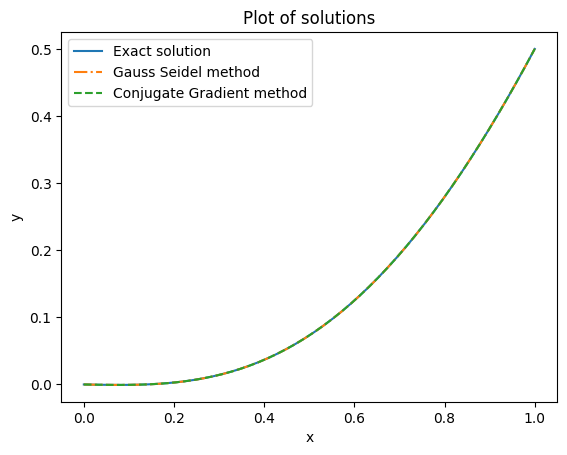

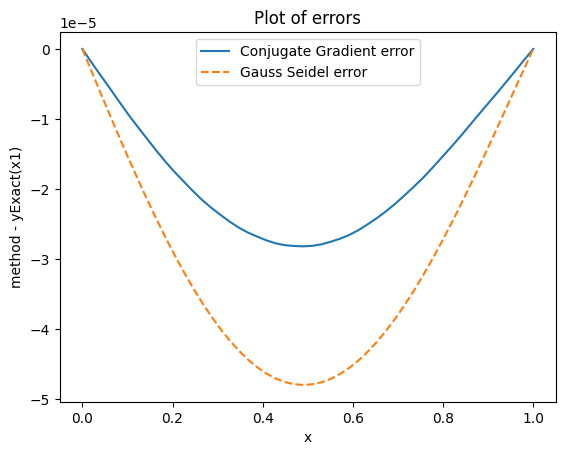

In [3]:
# your code goes here

import matplotlib.pyplot as plt


N= 50
h = 1/(N-1)
x1 = np.linspace(0,1,N)

#Matrix to approximate differential operator
#multiplying both sides by h**2
matA =((-2-(h**2))*np.diag(np.ones(N)) + np.diag(np.ones(N - 1), k=1) + np.diag(np.ones(N - 1), k=-1))
matA[0,1] = 0
matA[N-1,-2] = 0

#Creating vector b
vecb = np.zeros(N)
rhs = (x1 + np.sin(np.pi*x1))*(h**2)
vecb += rhs

#Boundary conditions
vecb[0] = 0
vecb[-1] = (1/2)*(-2-(h**2)) # in order to get yn = 1/2

#Methods

def GaussSeidel(A,x0,b,tol):

    Nx,Ny = np.shape(A)
    x = np.zeros(Nx)        # use x for the k iteration
    y = np.zeros(Nx)        # use y for the k+1 iteration
    x[:] = x0
    niter = Nx*Ny

    for k in range(niter):
        for i in range(Nx):

            s1 = A[i, :i]@y[:i]              # Lx^(k+1)
            s2 = A[i, i+1:]@x[i+1:]       # Ux^(k)
            y[i] = (b[i] - s1 - s2)/A[i,i]   # D^-1(b-Lx^(k+1)-Ux^(k))
        
        if(np.max(np.abs(A@y-b))<tol):       # check for convergence
            return y,k
        
        x[:] = y

    return x,k

def ConjGrad(A,x0,b,tol):

    Nx,Ny = np.shape(A)
    y = np.zeros(Nx)        # use y for the k+1 iteration
    niter = Nx*Ny
    rk = b-A@x0
    pk = np.copy(rk)

    for k in range(niter):
        Ap = A@pk
        alpha = np.dot(rk,pk)/np.dot(pk,Ap)
        y = x0 + alpha*pk
        rk = b-A@y
        pk = rk - pk*(np.dot(rk,Ap)/np.dot(pk,Ap))
        
        if(np.max(np.abs(rk))<tol):       # check for convergence
            return y,k
        
        x0[:] = y
    
    return x0,k

yGS , k_gs = GaussSeidel(matA,np.zeros(N),vecb,1.e-7)
yCG , k_cg = ConjGrad(matA,np.zeros(N),vecb,1.e-7)


#L2 norm
def norm2(x):
    norm = np.sqrt(np.sum(np.abs(x)**2))
    return norm

errorGS = norm2(yGS - yExact(x1))
errorCG = norm2(yCG - yExact(x1))


#Plotting
fig = plt.figure(1)
ax = fig.add_subplot(1,1,1)
ax.plot(x1,yExact(x1), label = "Exact solution")
ax.plot(x1, yGS , label="Gauss Seidel method",linestyle="dashdot")
ax.plot(x1,yCG, label= "Conjugate Gradient method",linestyle="dashed")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Plot of solutions")
ax.legend()

fig1 = plt.figure(2)
az = fig1.add_subplot(1,1,1)
az.plot(x1,yCG - yExact(x1),label="Conjugate Gradient error")
az.plot(x1,yGS - yExact(x1),label="Gauss Seidel error",linestyle="dashed")
az.set_xlabel("x")
az.set_ylabel("method - yExact(x1)")
az.set_title("Plot of errors")
az.legend();


In [4]:
# Don't edit this cell

if not "matA" in globals():
    raise NotImplementedError("matA has not been defined in Question 2")
if not "vecb" in globals():
    raise NotImplementedError("vecb has not been defined in Question 2")
if not "GaussSeidel" in globals():
    raise NotImplementedError("GaussSeidel has not been defined in Question 2")
if not "ConjGrad" in globals():
    raise NotImplementedError("ConjGrad has not been defined in Question 2")
if not "yCG" in globals():
    raise NotImplementedError("yCG has not been defined in Question 2")
if not "yGS" in globals():
    raise NotImplementedError("YGS has not been defined in Question 2")
if not "errorGS" in globals():
    raise NotImplementedError("errorGS has not been defined in Question 2")
if not "errorCG" in globals():
    raise NotImplementedError("errorCG has not been defined in Question 2")


## Q3

Given the values of the errors and residuals that you have obtained in Q2, answer the following by creating Python variables `answer1`, `answer2` to be the string `true` or `false`:

1. The tolerance of $10^{-7}$ specified in the conjugate gradient method is sufficiently small to ensure the accuracy of the finite difference approximation is captured, with this number of points.


2. The tolerance of $10^{-7}$ specified in the Gauss-Seidel method is sufficiently small to ensure the accuracy of the finite difference approximation is captured, with this number of points.

**[1]**

In [5]:
# your code goes here
answer1 = "true"
answer2 = "true"

In [6]:
# Don't edit this cell

if not "answer1" in globals():
    raise NotImplementedError("answer1 has not been defined in Question 3")
if not "answer2" in globals():
    raise NotImplementedError("answer2 has not been defined in Question 3")


## Q4

Using the Chebyshev differentiation matrix (`chebD` in lecture 2.7) create another version of the differential operator $\frac{d^2}{dx^2} - I$ again using 50 *interior* points and taking care with boundary contributions and the interval. 

Name the $50\times50$ matrix `matC` and the right hand side vector `vecd`. 

---

Solve the linear system using **Gauss-Seidel iteration** and the same tolerance and starting guess as in **Q2**, store the solution in `yCheb` and the $L_2$ relative error `errorCheb`. `yCheb` should include the boundary points. 


Plot the solutions and errors using appropriate axes, labels etc. 

---

As before, answer `true` or `false` using the python variable `answer3` for the following statement:

* the tolerance of $10^{-7}$ specified in the Gauss-Seidel method is sufficiently small to ensure the accuracy of the Chebyshev approximation is captured, with this number of points.

**[6]**


Matrix is not positive definite


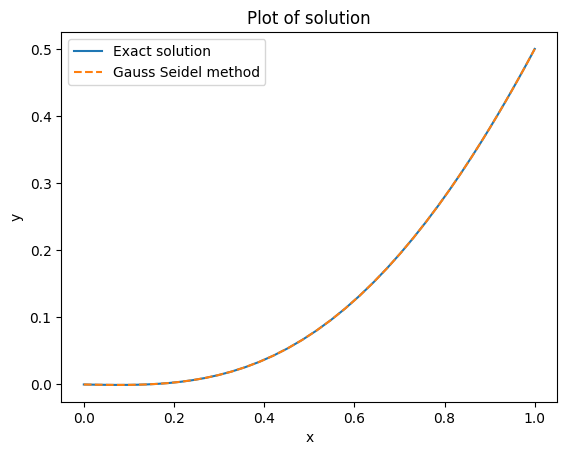

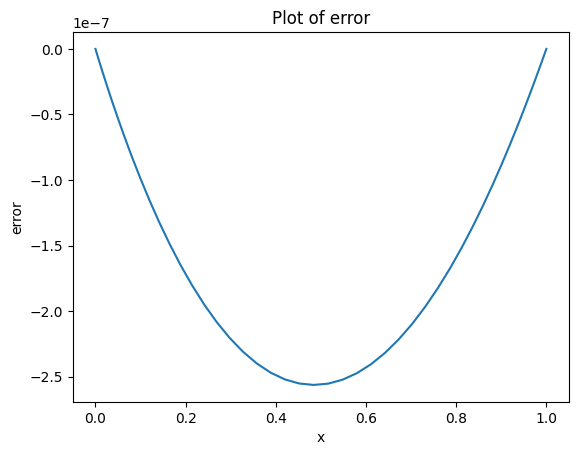

In [7]:
# your code goes here
def chebD(N): # Function to obtain the differentation matrix using Chebyshev poly
    if N==0:
        D = 0.; x = 1.
    else:
        n = np.arange(0,N+1)
        x =0.5*(1-np.cos(np.pi*n/N)).reshape(N+1,1) # modification to use points within [0,1]
        c = (np.hstack(( [2.], np.ones(N-1), [2.]))*(-1)**n).reshape(N+1,1)
        X = np.tile(x,(1,N+1))
        dX = X - X.T
        D = np.dot(c,1./c.T)/(dX+np.eye(N+1))
        D -= np.diag(np.sum(D.T,axis=0))
    return D, x.reshape(N+1)

#Chebyshev differentiation matrix - need to square to get the approximation for the second derivative
matC , x2 = chebD(N-1)
matC = matC@matC
matC = matC - np.eye(N)

#Boundary conditions on matc
matC[0,:] = np.zeros(N)
matC[0,0] = 1
matC[-1, :] = np.zeros(N)
matC[-1, -1] = 1

#vecd construction
vecd = np.zeros(N)
rhs = x2 + np.sin(np.pi*x2)
vecd += rhs

#Boundary conditions on vecd
vecd[0] = 0
vecd[-1] = 1/2


#Gauss Seidel iteration
yCheb, k_gs = GaussSeidel(matC,np.zeros(N),vecd,1.e-7)

#L2 relative error
errorCheb = norm2(yCheb - yExact(x2))

#Answering Question
answer3 = "true"

#Code that shows matrix is not positive definite (for Q5)
try:
    np.linalg.cholesky(matC)    
except Exception as e:
    print(e)


#Plotting
fig = plt.figure(1)
ax = fig.add_subplot(1,1,1)
ax.plot(x2,yExact(x2), label = "Exact solution")
ax.plot(x2, yCheb , label="Gauss Seidel method",linestyle="dashed")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Plot of solution")
ax.legend();

fig1 = plt.figure(2)
az = fig1.add_subplot(1,1,1)
az.plot(x2, yCheb - yExact(x2))
az.set_xlabel("x")
az.set_ylabel("error")
az.set_title("Plot of error");

In [8]:
# Don't edit this cell

if not "matC" in globals():
    raise NotImplementedError("matC has not been defined in Question 4")
if not "vecd" in globals():
    raise NotImplementedError("vecd has not been defined in Question 4")
if not "yCheb" in globals():
    raise NotImplementedError("yCheb has not been defined in Question 4")
if not "errorCheb" in globals():
    raise NotImplementedError("errorCheb has not been defined in Question 4")
if not "answer3" in globals():
    raise NotImplementedError("answer3 has not been defined in Question 4")




## Q5

Why is the conjugate gradient method not applicable to the Chebyshev formulation? Write one short sentence to explain in the markdown box below. 

**[1]**

The conjugate gradient method requires that the matrix is positive definite and since matC is not, it is not applicable.

## Q6

Obtain the condition number of the two matrices `matA` and `matC` using `np.linalg.cond` under the $L_\infty$ norm and store these in variables `conA` and `conC`.

Increase the size of the system to $100\times100,$ (i.e. 100 interior points) creating `matA_100` (as in Q2) and `matC_100` (as in Q4), and obtain new condition numbers `conA_100` and `conC_100`.

---

Obtain the solution to the two $N=100$ systems from above using Gauss-Seidel iteration, storing the resulting $L_2$ relative error  in the Python variables `errFD_100` and `errCH_100` for finite-difference and Chebyshev respectively. You should take care to ensure the solutions of the systems are "fully" converged to an appropriate tolerance. 

**[4]**

In [9]:
# your code goes here

conA = np.linalg.cond(matA,np.inf)
conC = np.linalg.cond(matC,np.inf)

N= 100
h = 1/(N-1)
x1 = np.linspace(0,1,N)

#Obtaining MatA_100
matA_100 =((-2-(h**2))*np.diag(np.ones(N)) + np.diag(np.ones(N - 1), k=1) + np.diag(np.ones(N - 1), k=-1))
matA_100[0,1] = 0
matA_100[N-1,-2] = 0


#Obtaining vecb
vecb = np.zeros(N)
rhs = (x1 + np.sin(np.pi*x1))*(h**2)
vecb += rhs

#Boundary conditions on vecb
vecb[0] = 0
vecb[-1] = (1/2)*(-2-(h**2))


#Obtaining MatC_100
matC_100 , x2 = chebD(N-1)
matC_100 = matC_100@matC_100
matC_100 = matC_100 - np.eye(N)

matC_100[0,:] = np.zeros(N)
matC_100[0,0] = 1
matC_100[-1, :] = np.zeros(N)
matC_100[-1, -1] = 1

#vecd construction
vecd = np.zeros(N)
rhs = x2 + np.sin(np.pi*x2)
vecd += rhs

#Boundary conditions on vecd
vecd[0] = 0
vecd[-1] = 1/2


#Condition numbers
conA_100 = np.linalg.cond(matA_100,np.inf)
conC_100 = np.linalg.cond(matC_100,np.inf)

yGSFD , k_gsFD = GaussSeidel(matA_100,np.zeros(N),vecb,1.e-5)
yGSCH , k_gsCH = GaussSeidel(matC_100,np.zeros(N),vecd,1.e-3) #Lower tolerance to ensure "full" convergence

errFD_100 = norm2(yGSFD - yExact(x1))
errCH_100 = norm2(yGSCH - yExact(x2))

In [10]:
# Don't edit this cell

if not "conA" and "conC" in globals():
    raise NotImplementedError("conA and conC have not been defined in Question 6")

if not "matA_100" and "matC_100" in globals():
    raise NotImplementedError("matA_100 and matC_100 have not been defined in Question 6")

if not "conA_100" and "conC_100" in globals():
    raise NotImplementedError("conA_100 and conC_100 have not been defined in Question 6")

if not "errFD_100" in globals():
    raise NotImplementedError("errFD_100 has not been defined in Question 6")

if not "errCH_100" in globals():
    raise NotImplementedError("errCH_100 has not been defined in Question 6")



## Q7

In the markdown cell below, write a sentence or two to answer each of the following.

* Is the expected convergence rate for the finite difference method observed when comparing $N=50$ and $N=100?$ If so how is it seen? If not, why not?

* Given the structure of the finite difference differentiation matrix, suggest a way to increase the efficiency (or decrease resource use) of the implementation. Would this be applicable to the Chebyshev case? 

* Is decreasing the Gauss-Seidel tolerance (from the starting case of $10^{-7}$) an effective way to increase the accuracy of the Chebyshev approximation with 100 points? What about the finite difference case?

* Describe a more appropriate stopping criterion for the Gauss-Seidel iterative method which makes use of the condition number (do not implement this in your submitted code).

Justify all of your answers.

**[5]**

The expected convergence rate for finite difference is O(h^2) so doubling the number of points should reduce the error by 1/4. However this rate is not seen when comparing N=50 and N=100. This is because the N=100 matrix has a much higher condition number so small floating point errors when computing the solution could produce large errors.

The finite difference differentiation matrix is sparse, as most of the elements are 0 apart from 3 diagonals. There are more efficient ways to store this in a data structure such as by using the scipy.sparse module. This would not be applicable to the Chebyshev case as the matrix for that is dense.

Decreasing the Gauss-Seidel tolerance in the 100 point Chebyshev approximation does not increase the accuracy as the method is not converging fully and ends after a certain number of iterations. However, in the finite difference case, decreasing the tolerance does increase the accuracy as it is converging faster. After 1.e-9 tolerance it also starts to reach the limit of iterations defined in the gauss-seidel function.

A more appropriate stopping criterion would be to multiply the tolerance by the condition number. This would capture the idea that ill-conditioned matrices would require a higher tolerance to successfully converge, while better behaved matrices can use lower a lower tolerance.